# 使用forcats处理因子

因子在Ｒ中是很常用的，本章使用forcats包处理因子

In [1]:
library(tidyverse)
library(forcats)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# 使用字符串记录月份
x1 <- c("Dec", "Apr", "Jan", "Mar")
x2 <- c("Dec", "Apr", "Jam", "Mar")
# 排序
sort(x1)
# 创建月份有效水平
month_levels <-c("Jan", "Feb", "Mar", "Apr", 
                 "May", "Jun",  "Jul", "Aug", 
                 "Sep", "Oct", "Nov", "Dec" )
# 创建因子
y1 <-factor(x1, levels = month_levels)
y1
sort(y1)
y2 <-factor(x2, levels = month_levels)
y2
# 我们容易发现x2的错误
# 如果想要显示错误信息，那么可以使用readr::parse_factor()函数：
y2 <-parse_factor(x2, levels = month_levels)

# 如果省略了定义水平的这个步骤，那么会将按字母顺序排序的数据作为水平：
factor(x1)

[1] "Apr" "Dec" "Jan" "Mar"

[1] Dec Apr Jan Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

[1] Jan Mar Apr Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

[1] Dec  Apr  <NA> Mar 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

Warning message:
“1 parsing failure.
row col           expected actual
  3  -- value in level set    Jam
”

[1] Dec Apr Jan Mar
Levels: Apr Dec Jan Mar

In [3]:
# 使因子的顺序与初始数据的顺序保持一致。
# 在创建因子时，将水平设置为unique(x)，
# 或者在创建因子后再对其使用fct_inorder()函数
f1 <-factor(x1, levels =unique(x1))
f1
f2 <- x1 %>%factor() %>%fct_inorder() 
f2
# 显示因子有效水平
levels(f2)

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

[1] "Dec" "Apr" "Jan" "Mar"

## 综合社会调查

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA


race,n
<fct>,<int>
Other,1959
Black,3129
White,16395


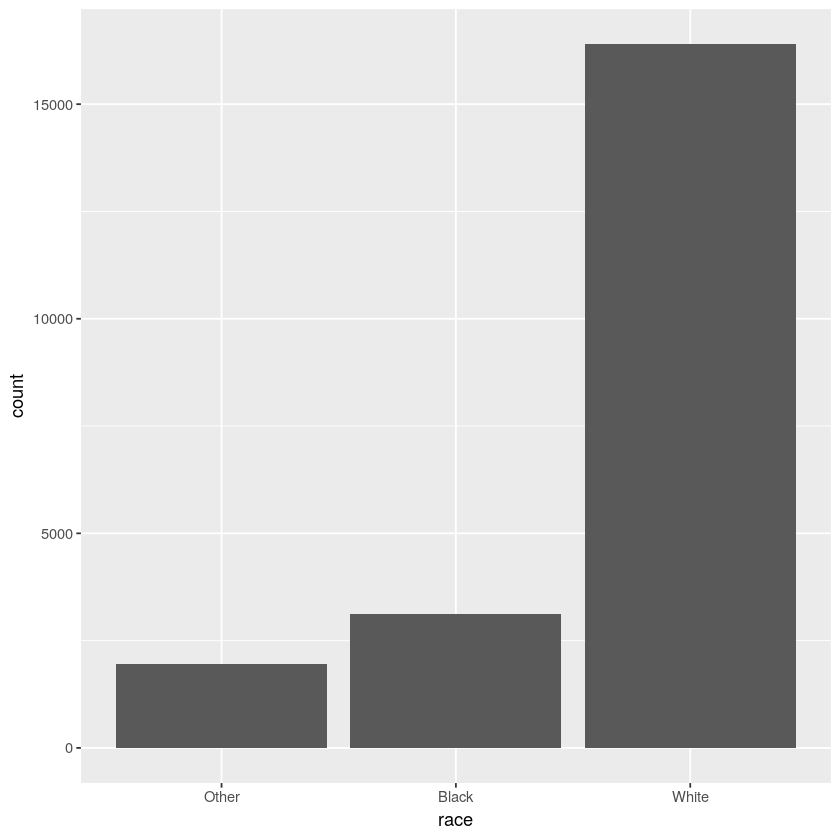

In [4]:


gss_cat %>% head()# 查看数据

# 查看因子水平的方法
gss_cat %>% count(race)# 计数
gss_cat %>% ggplot(aes(race)) + geom_bar()

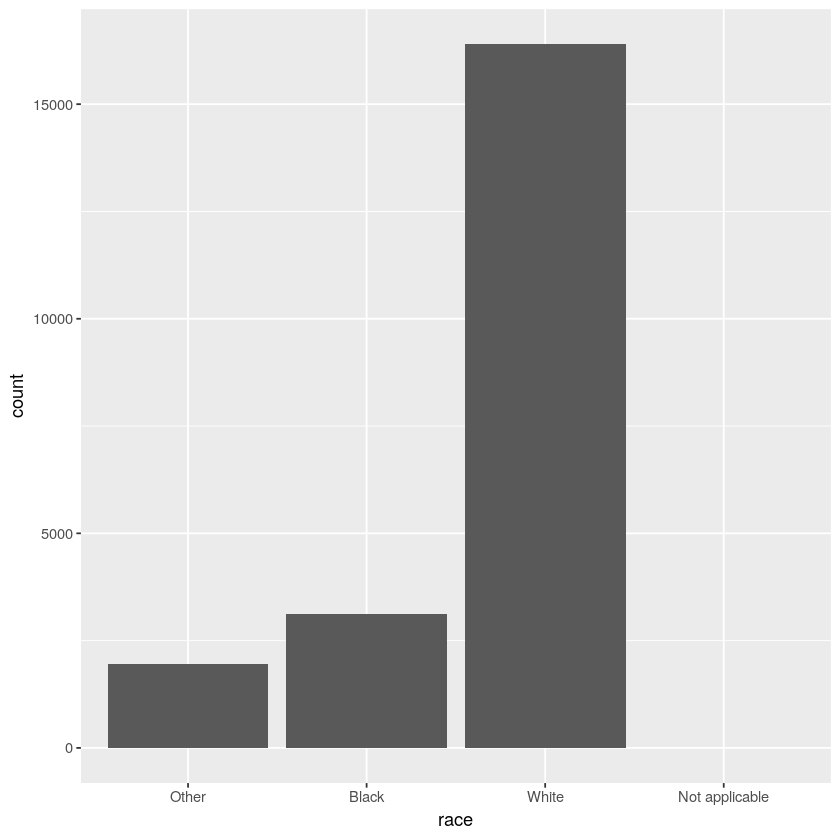

In [5]:
# 默认情况下，ggplot2会丢弃没有任何数据的那些水平，你可以使用以下代码来强制显示这些水平：
ggplot(gss_cat, aes(race)) +
geom_bar() +
scale_x_discrete(drop =FALSE)

## 修改因子水平

In [6]:
# 修改水平最常用、最强大的工具是fct_recode()函数，它可以对每个水平进行修改或重新编码
gss_cat %>% count(partyid)

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
Strong republican,2314
Not str republican,3032
"Ind,near rep",1791
Independent,4119
"Ind,near dem",2499
Not str democrat,3690


In [7]:
# 修改
gss_cat %>%mutate(partyid =fct_recode(partyid,     
     "Republican, strong"    = "Strong republican",    
     "Republican, weak"      = "Not str republican",    
     "Independent, near rep" = "Ind,near rep",    
     "Independent, near dem" = "Ind,near dem",    
     "Democrat, weak"        = "Not str democrat",    
     "Democrat, strong"      = "Strong democrat"   )) %>%
count(partyid) 

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690


In [8]:
# 将多个原水平赋给同一个新水平，这样就可以合并原来的分类：
gss_cat %>%mutate(partyid =fct_recode(partyid,     
     "Republican, strong"    = "Strong republican",    
     "Republican, weak"      = "Not str republican",    
     "Independent, near rep" = "Ind,near rep",    
     "Independent, near dem" = "Ind,near dem",    
     "Democrat, weak"        = "Not str democrat",    
     "Democrat, strong"      = "Strong democrat",    
     "Other"                 = "No answer",    
     "Other"                 = "Don't know",    
     "Other"                 = "Other party"  )) %>%count(partyid)

partyid,n
<fct>,<int>
Other,548
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490


In [9]:
# 如果想要合并多个水平，那么可以使用fct_recode()函数的变体fct_collapse()函数。对于每个新水平，你都可以提供一个包含原水平的向量：
gss_cat %>%mutate(partyid =fct_collapse(partyid,     
      other =c("No answer", "Don't know", "Other party"),     
      rep =c("Strong republican", "Not str republican"),     
      ind =c("Ind,near rep", "Independent", "Ind,near dem"),     
      dem =c("Not str democrat", "Strong democrat")   )) %>%
count(partyid) 

partyid,n
<fct>,<int>
other,548
rep,5346
ind,8409
dem,7180


## 练习

美国民主党、共和党和中间派的人数比例是如何随时间而变化的？

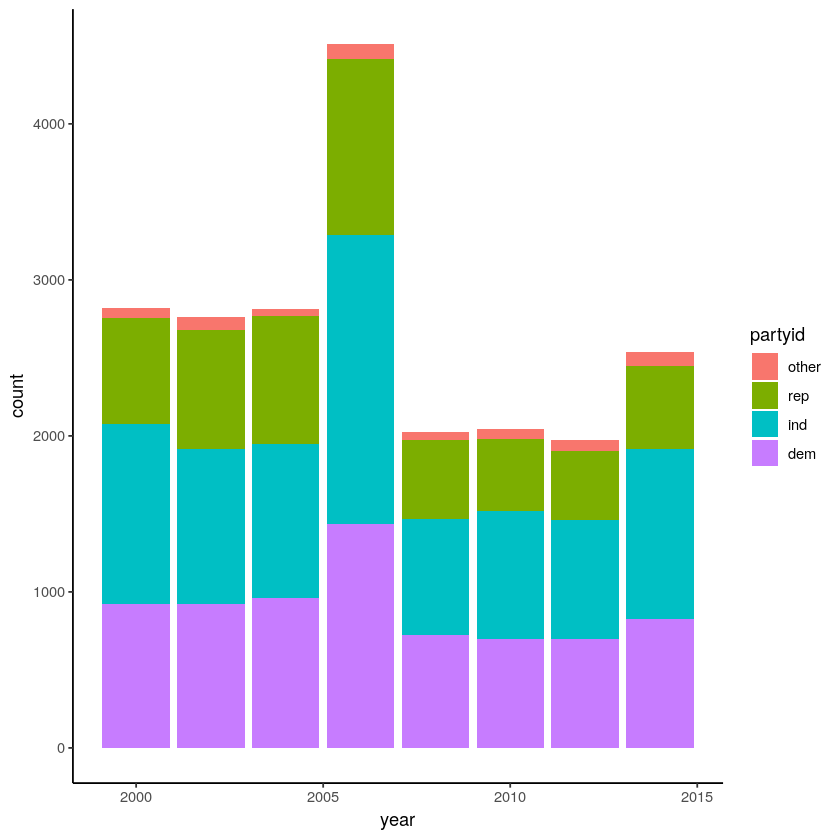

In [10]:
gss_cat %>%mutate(partyid =fct_collapse(partyid,     
      other =c("No answer", "Don't know", "Other party"),     
      rep =c("Strong republican", "Not str republican"),     
      ind =c("Ind,near rep", "Independent", "Ind,near dem"),     
      dem =c("Not str democrat", "Strong democrat")   )) %>%
ggplot(aes(year, fill = partyid)) + geom_bar(position = "stack") +
theme_classic()